In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sqlite3

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Carga de datos
features = pd.read_csv('../data/final/ml_features_final.csv')
target = pd.read_csv('../data/final/ml_target_final.csv')

In [3]:
# Vista general
print("Dimesiones de features:", features.shape)
print("Dimesiones de target:", target.shape)

Dimesiones de features: (100, 28)
Dimesiones de target: (100, 1)


In [4]:
# Mostrar las primeras filas de los datos
features.head()

,precio,cantidad,calificacion,dia_semana,mes,trimestre,categoria_Alimentos,categoria_Electrónica,categoria_Hogar,categoria_Juguetes,...,tendencia_mercado_BAJANDO,tendencia_mercado_ESTABLE,tendencia_mercado_SUBIENDO,precio_norm,cantidad_norm,calificacion_norm,competidores_norm,sentimiento_social_norm,frecuencia_compra_norm,valor_cliente_norm
0,72.20,10,1.0,6,1,1,0,1,0,0,...,0,1,0,-0.928566,1.537332,-1.614146,1.137721,0.721906,0.942014,0.758621
1,121.62,8,3.8,0,1,1,0,0,0,0,...,0,0,1,0.791716,0.841707,0.684739,1.137721,-0.503972,-0.529883,-0.247476
2,111.66,7,2.8,1,1,1,0,0,1,0,...,0,1,0,0.445014,0.493894,-0.136291,-0.697313,0.381384,0.206066,-0.200324
3,132.63,5,1.1,2,1,1,1,0,0,0,...,0,1,0,1.174968,-0.201731,-1.532043,-1.431326,0.381384,-1.081844,-1.312679
4,68.01,7,4.6,3,1,1,0,0,0,1,...,0,0,1,-1.074417,0.493894,1.341564,1.137721,0.074915,-1.449818,0.723501


In [5]:
# Estadísticas descriptivas
features.describe()

,precio,cantidad,calificacion,dia_semana,mes,trimestre,categoria_Alimentos,categoria_Electrónica,categoria_Hogar,categoria_Juguetes,...,tendencia_mercado_BAJANDO,tendencia_mercado_ESTABLE,tendencia_mercado_SUBIENDO,precio_norm,cantidad_norm,calificacion_norm,competidores_norm,sentimiento_social_norm,frecuencia_compra_norm,valor_cliente_norm
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,98.875700,5.580000,2.966000,3.000000,2.200000,1.100000,0.200000,0.200000,0.200000,0.200000,...,0.360000,0.310000,0.330000,6.550316e-16,-2.220446e-18,6.150636e-16,-1.354472e-16,-3.663736e-17,-1.693090e-16,-5.107026e-17
std,28.727849,2.875111,1.217981,2.035046,0.994937,0.301511,0.402015,0.402015,0.402015,0.402015,...,0.482418,0.464823,0.472582,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,50.170000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.695418e+00,-1.592982e+00,-1.614146e+00,-1.431326e+00,-1.729850e+00,-1.633805e+00,-1.812250e+00
25%,72.455000,3.000000,1.875000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-9.196895e-01,-8.973567e-01,-8.957444e-01,-6.973126e-01,-8.955717e-01,-8.978570e-01,-8.170725e-01
50%,101.070000,5.500000,3.100000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.638233e-02,-2.782501e-02,1.100181e-01,3.670066e-02,1.600451e-01,2.207845e-02,1.055019e-01
75%,122.095000,8.000000,3.900000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,8.082505e-01,8.417067e-01,7.668426e-01,7.707140e-01,7.389318e-01,9.420139e-01,7.791695e-01
max,149.970000,10.000000,5.000000,6.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.778563e+00,1.537332e+00,1.669976e+00,1.504727e+00,1.539157e+00,1.677962e+00,1.687758e+00


In [6]:
# Correlación con la variable objetivo
# Unir features y target para análiis
data = features.copy()
data['ingresos'] = target.iloc[:, 0]

In [7]:
# Selecionar las columnas numéricas
numeric_cols = data.select_dtypes(include=[np.number]).columns

In [8]:
# Calcular matriz de correlación
corr = data[list(numeric_cols) + ['ingresos']].corr()

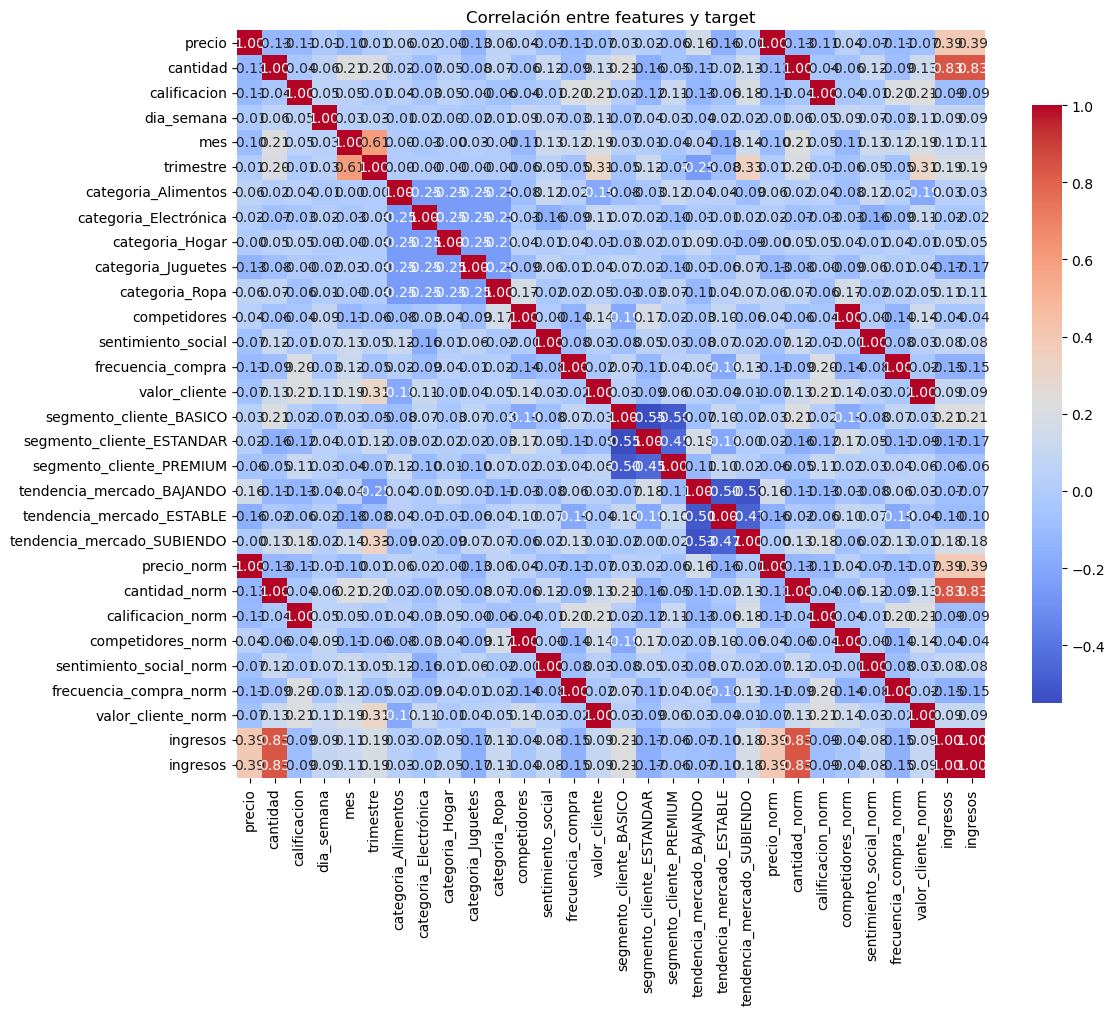

In [ ]:
# Visualizar correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre features y target')
plt.tight_layout()
plt.show()